## <center>MNIST Dataset</center>

### The Data

Here we work on the MNIST (Modified National Institute of Standards and Technology database), which is a large database of handwritten digits that is commonly used for training various image processing systems. 

### Our Goal
Our goal is to built an efficient deep learning model to identify handwritten digits.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist

### Data exploration and reshaping the model

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

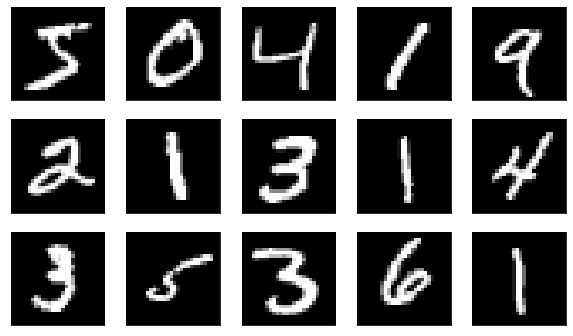

In [3]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap='gray')
plt.show()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In this case, as it can be seen, the model is 3D and TF doesn´t accept 3D models, so it must be reshaped!!

layers.Flatten() will be used

### Model 

In [5]:
#Creating base neural network
model = Sequential([
    layers.BatchNormalization(), # Normalizes the data, not need to scale or standarize data in previous steps
    layers.Flatten(input_shape=(X_train.shape[1], X_train.shape[2])), #Flattens the vector into 2D

    layers.Dense(128, activation='elu', input_shape=(784,)), 
    # input_shape tells the amount of categories the input has, helps the NN
    # ELU works better than ReLU, however takes more time to compile
    layers.Dropout(0.3),
    layers.BatchNormalization(), # Normalizes the data

    layers.Dense(24, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    layers.Dense(24, activation='elu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),

    layers.Dense(10,activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [6]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [7]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test), verbose=0,
          batch_size=256,
          callbacks=[early_stop]
          )

Epoch 20: early stopping


### Results

<AxesSubplot:>

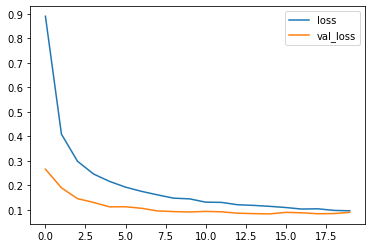

In [8]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [9]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


In [10]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 970    1    0    1    0    1    4    1    1    1]
 [   0 1124    2    1    0    1    2    0    5    0]
 [   3    2 1003    5    1    0    3    8    7    0]
 [   0    0    2  990    0    8    0    4    3    3]
 [   2    0    6    0  947   